# The Third Homework of computational physics
## Information
* Name：韩懿杰
* student number：20213006413
## 一、题目：
已知$y=x^4+4x^3-6x^2-16x+4$,在$-1<x<4$中以弦割法寻找零点和极小值点。
（似乎让写的是切线法，但我最后才发现。。。着实不想改了）
## 二、分析：
此问题为求y零点和y一阶导零点问题，最小值为一阶导数零点处的函数值的最小值或区间端点。对于求指定区间的零点问题，难点有二：

1. 零点个数问题，即是否可以找到所有的零点。

2. 零点的精确提高度问题，即对于指定零点，是否可以快速收敛？

对于问题一，我们将求解区间等距分割若干个子区间，假设每一个端点异号的子区间仅存在一个零点。但注意，这始终是个无法严格避免的问题。

对于问题二，我们以切线或者弦割法快速收敛。
## 三、预处理
### 1、辅助函数
画图习惯设置

In [1]:
# Labrary
import numpy as np
import matplotlib.pyplot as plt
# Graph in pack
def graph(ax,x,y,x_label="x0",y_label="y0",title="Title0",legend='legend0',loc='upper left',color="color",linestyle='-'):
    ## Parameter
    ### rangle
    x_range=np.array([np.min(x)-0.1*(np.max(x)-np.min(x)),np.max(x)+0.1*(np.max(x)-np.min(x))])
    y_range=np.array([np.min(y)-0.1*(np.max(y)-np.min(y)),np.max(y)+0.1*(np.max(y)-np.min(y))])

    ## figure
    ## plot
    ax.plot(x,y,marker='o',color=color,linestyle=linestyle,linewidth=2.0,label=legend)
    ## title
    ax.set_title(title,fontname='Arial',fontsize=20,weight='bold',x=0.5,y=1)
    ## legend
    ax.legend(loc=loc,prop = {'size':8})
    ## Axis
    ### label
    ax.set_xlabel(x_label,fontsize=14,labelpad=0)
    ax.set_ylabel(y_label,fontsize=14)
    ### limit
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ### tick
    #axn.set_xticks(np.linspace(0,10,4)) #x axis scale. range: 0-10，points: 4
    #axn.set_xticklabels(['you','are','so','nice'])
    ax.tick_params(axis='both',direction='in',color='black',length=5,width=1) #axis='x'or'y'or'both'
    
    return 0


### 2、此题自定义函数，共5个

In [2]:
# Libary
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import sympy as sp #此库精通解析解。

## 定义求解函数形式
def func(x):
    return x**4-4*x**3-6*x**2-16*x+4

## 得到求解函数之一阶导函数。不算开挂，因为解析导数一般可求。
variablex = sp.Symbol('x')
### 创建方程组
expr1 =variablex**4-4*variablex**3-6*variablex**2-16*variablex+4
### 求导
derivative = sp.diff(expr1, variablex)
### Definition 一阶导函数
difffunc = sp.lambdify(variablex,derivative, 'numpy')

# 二分法判断子区间是否存在（实际不严格）零点
def half(func,subrange_x):
    if func(subrange_x[0])*func(subrange_x[1])<=0:
        return 1
    else:
        return 0

# 指定子区间以弦割法零点精确计算，要求最大误差：limited_error,最多迭代N次防止死循环。
def chord_cut(func,subrange_x,limited_error,N):  
    positiona=subrange_x[0]
    positionb=subrange_x[1]
    for i in range(N):
        k=(positiona-positionb)/(func(positiona)-func(positionb))
        t=positionb-func(positionb)*k
        error=np.abs(func(t))
        if error<limited_error:
            return t,error,i
        else:
            positiona=positionb
            positionb=t
            if i==N-1:
                print("别找了，找不到")
                break 
                
# 综合函数，二分法定零点个数，然后弦割法收敛。
## Input 
## Output [[区间0][区间1]...];[[x0,error,N],[]]
def solve_zero(range_x,func,method1=half,method2=chord_cut,limited_error=1e-6,N=100):  
    # 二分法定零点个数,所在子区间
    zero_subrange=np.array([[]])
    for i in range(np.size(range_x)-1):
        subrange_x=np.array([[range_x[i],range_x[i+1]]])
        if half(func,subrange_x[0,:]):
            zero_subrange=np.concatenate((zero_subrange,subrange_x),axis=1) 
    # 弦割法收敛
    zero_value_infor=np.zeros(((np.shape(zero_subrange))[0],3))
    for i in range((np.shape(zero_subrange))[0]):
        subrange_x=zero_subrange[i,:]
        zero_value_infor[i,:]=chord_cut(func,subrange_x,limited_error,N)
    return zero_subrange,zero_value_infor

## 四、正文代码

In [3]:
range_x=np.linspace(-1,4,100)
# 函数零点信息
zero_subrange,zero_value_infor=solve_zero(range_x,func,method1=half,method2=chord_cut,limited_error=1e-6,N=100)
# 导函数
## 零点信息
fzero_subrange,fzero_value_infor=solve_zero(range_x,difffunc,method1=half,method2=chord_cut,limited_error=1e-6,N=100)
## 最小值,考虑端点
t=np.append(fzero_value_infor[:,0],np.array([range_x[0],range_x[-1]]))
minvalue=np.min(func(t))
seq=t[np.argmin(func(t))]

## 五、图像验证

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


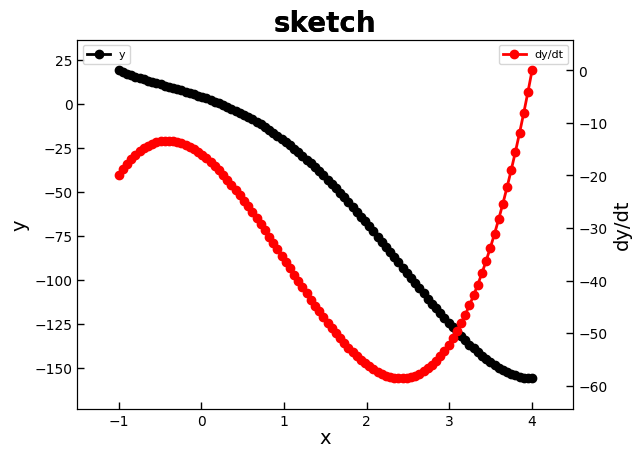

In [4]:
# fig
ax=[0,0]
fig = plt.figure()
ax[0] = fig.add_subplot(1,1,1)
ax[1]=ax[0].twinx()
# data
x_ndarray=range_x
y0_ndarray=func(range_x)
y1_ndarray=difffunc(range_x)
# plot
graph(ax[0],x_ndarray,y0_ndarray,x_label="x",y_label="y",title="sketch",legend='y',color='k')
graph(ax[1],x_ndarray,y1_ndarray,x_label="x",y_label="dy/dt",title="sketch",legend='dy/dt',loc='upper right',color='r')#note some parameter follow with 0

# output
plt.show()
#plt.savefig('savefig_example.eps') #eps piture

## 六、结论
以一段格式化输出作为此作业结果：
由此可见这个函数有点浪费这个代码。

In [6]:
print("该函数共有零点{}个，二分法估计其区间分别为{},\n\
弦割法确定其位置分别{}，误差{}，迭代次数{},\n"\
.format((np.shape(zero_subrange))[0],zero_subrange,zero_value_infor[:,0],\
        zero_value_infor[:,1],zero_value_infor[:,2]))
print("该导函数共有零点{}个，二分法估计其区间分别为{},\n\
弦割法确定其位置分别{}，误差{}，迭代次数{},\n"\
.format((np.shape(fzero_subrange))[0],fzero_subrange,fzero_value_infor[:,0],\
        fzero_value_infor[:,1],fzero_value_infor[:,2]))
print("该函数最小值在{}处，对应函数值{}".format(seq,minvalue))

该函数共有零点1个，二分法估计其区间分别为[[0.21212121 0.26262626]],
弦割法确定其位置分别[0.22776121]，误差[7.20294757e-09]，迭代次数[2.],

该导函数共有零点1个，二分法估计其区间分别为[[3.94949495 4.        ]],
弦割法确定其位置分别[4.]，误差[0.]，迭代次数[0.],

该函数最小值在4.0处，对应函数值-156.0
